# Навыки Python

##### Первый блок - Библиотека Pandas:
    1)Получение общего представления о данных
    2)Фильтрация данных по условию
    3)Агрегация, группировка данных
    4)Сортировка
    5)Форматирование данных
    6)Изменение структуры датафрейма
    7)Сводные таблицы
    8)Объединение данных из разных источников
    9)Работа с текстовыми данными
    10)Работа с датами
    
##### Второй блок - визуализация данных с помощью Matplotlib:
    1)Графики
    2)Диаграммы
    3)Столбчатые диаграммы
    4)Круговые диаграммы
    5)Спектральные диаграммы
    6)Поля градиентов
    
##### Третий блок - визуализация данных с помощью searbotn:
    1) Парные диаграммы
    2) Тепловая карта(кореляция)
    3) Линейный график
    4) Ящик с усами

In [1]:
# Подключаем библиотеку
import pandas as pd

In [2]:
# Считываем данные из файла
df = pd.read_csv('athlete_events.csv')

## Получение общего представления о данных

### head(), tail(), info(), describe(), shape, dtypes

In [3]:
# Вывод первых 2 строк(5 по умолчанию)
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [4]:
# Вывод последних 2 строк(5 по умолчанию), количество можно указать
df.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
# Получение общей информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
# Получение статистической информации о датасете, по умолчанию для числовых колонок
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
# Размерность датасета
df.shape

(271116, 15)

In [8]:
# Типы данных
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [9]:
# Названия столбцов
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [10]:
# Тип датасета
type(df.dtypes)

pandas.core.series.Series

In [11]:
# Размер датасета
len(df)

271116

## Методы loc и iloc для доступа к данным датасета

In [12]:
df.iloc[1:100:10,0:6].head(2) #имя файла.индекс столбца[срез с какой по какую строку:шаг,с какого по какой столбец]

,ID,Name,Sex,Age,Height,Weight
1,2,A Lamusi,M,23.0,170.0,60.0
11,6,Per Knut Aaland,M,31.0,188.0,75.0


In [13]:
df.loc[:,['ID','Team']].head(2)

,ID,Team
0,1,China
1,2,China


In [14]:
df.loc[1:5,['Team','NOC','Games']].head(2)

,Team,NOC,Games
1,China,CHN,2012 Summer
2,Denmark,DEN,1920 Summer


## Фильтрация данных по условию

In [15]:
# Формируем условие для фильтра
a = df['Age']<20
a.head(2)

0    False
1    False
Name: Age, dtype: bool

In [16]:
# Получаем данные по условию
df[a][df[a]['Sex']=='M'].head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
203,96,Carlos Rodolfo Abaunza Balladares,M,18.0,168.0,60.0,Nicaragua,NCA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN
204,97,Carlos Alberto Abaunza,M,16.0,180.0,70.0,Nicaragua,NCA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's High Jump,NaN


In [17]:
# Вывести на экран имена золотых медалистов 2012 года
df[(df['Medal']=='Gold')&(df['Year']==2012)]['Name'].tolist()  #данные[(условие 1)&(условие 2)][условие 3].Строка

['Luc Abalo',
 'William Accambray',
 'Nicola Virginia Adams',
 'Valerie Kasanita Adams-Vili (-Price)',
 'Filip Kamil Adamski',
 'Adenzia Aparecida Ferreira da Silva',
 'Nathan Ghar-Jun Adrian',
 'Nathan Ghar-Jun Adrian',
 'Marilyn Agliotti',
 'Yannick Agnel',
 'Yannick Agnel',
 'Charles Benedict "Ben" Ainslie',
 'Marina Alabau Neira',
 'Jo Qesem Ayela Aleh',
 'Ida Alstad',
 'An Kum-Ae',
 'Alyssa Jean Anderson',
 'Carmelo Kyan Anthony',
 'Nataliya Nikolayevna Antyukh',
 'Nikolay Sergeyevich Apalikov',
 'Javier Ignacio Aquino Carmona',
 'Elizabeth "Betsey" Armstrong',
 'Kristin Ann Armstrong (-Savola)',
 'Laura Asadauskait-Zadneprovskien',
 'Valerio Aspromonte',
 'Sandra Auffarth',
 'Seimone Delicia Augustus',
 'Giorgio Avola',
 'Viktoriya Fyodorovna "Vika" Azarenko',
 'Kemar Bailey-Cole',
 'Timothy "Tim" Baillie',
 'Keshia Chantay Baker (-Kirtz)',
 'Andrea Baldini',
 'Samir Bara',
 'Xavier Barachet',
 'Anna Rose Bebington-Watkins',
 'Laura Bechtolsheimer (-Tomlinson)',
 'Mathew Belcher'

In [18]:
# Вывести на экран имена золотых медалистов 2012,2016 года
df[df['Year'].isin([2012,2016])] #чтобы не писать повторения (df['Year']==2012) & (df['Year']==2016)
years = [2012,2016]  #второй вариант, чтобы не писать повторения (df['Year']==2012) & (df['Year']==2016)
df[df['Year'].isin(years)].head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN


In [19]:
# показывает те строги где НЕТ значений в возрасте
df[df['Age'].isnull()].head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN


In [20]:
# показывает те строги где есть значения медали
df[df['Medal'].notnull()].head(2)  

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze


## Агрегирующие функции
    max() - максимум
    min() - минимум
    mean() - среднее значение
    sum() - сумма
    count() - количество непустых элементов
    std() - стандартное отклонение

In [21]:
# Средний возраст спортсменов
df['Age'].mean()


25.556898357297374

In [22]:
# Год первой и последней Олимпиаде в датасете
df['Year'].min()

1896

In [23]:
# В каком виде спорта участвовал самый высокий спортсмен
MostTall = df['Height'].max()
#объявляем по какому столбцу ищем == условие, [что на вывод показать]
df.loc[df['Height']==df['Height'].max(),['Name','Sport']]  

,Name,Sport
265040,Yao Ming,Basketball
265041,Yao Ming,Basketball
265042,Yao Ming,Basketball


## Группировка данных и Сортировка

In [24]:
#список команд  создается
df['Team'].unique()  

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [25]:
#Как часто страны участвовали в Олимпиаде?
df['Team'].nunique() 

1184

In [26]:
#Количество мужчин и женщин
df['Sex'].value_counts()    

Sex
M    196594
F     74522
Name: count, dtype: int64

In [27]:
#переменная = Кол-во дисциплин 
s = df['Sport'].value_counts()    
s[s>20000]  #сортировка по значению

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Name: count, dtype: int64

In [28]:
#Сортировка по 2м столбцам
df.sort_values(['NOC','Sport'], ascending=False)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
48411,24958,Addison Brian Dale,M,37.0,180.0,91.0,Zimbabwe,ZIM,1980 Summer,1980,Summer,Moskva,Weightlifting,Weightlifting Men's Heavyweight I,NaN
67557,34530,"Christopher James ""Chris"" Felgate",M,26.0,189.0,77.0,Zimbabwe,ZIM,2008 Summer,2008,Summer,Beijing,Triathlon,Triathlon Men's Olympic Distance,NaN
67558,34530,"Christopher James ""Chris"" Felgate",M,30.0,189.0,77.0,Zimbabwe,ZIM,2012 Summer,2012,Summer,London,Triathlon,Triathlon Men's Olympic Distance,NaN
148911,74696,Mark Marabini,M,35.0,181.0,75.0,Zimbabwe,ZIM,2000 Summer,2000,Summer,Sydney,Triathlon,Triathlon Men's Olympic Distance,NaN
22755,11972,Byron Hamish Black,M,26.0,175.0,70.0,Zimbabwe,ZIM,1996 Summer,1996,Summer,Atlanta,Tennis,Tennis Men's Singles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264047,132125,Robina Muqim Yaar,F,22.0,180.0,56.0,Afghanistan,AFG,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN
266399,133277,Kamia Yousufi,F,20.0,165.0,55.0,Afghanistan,AFG,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN
267228,133698,Abdul Wahab Zahiri,M,24.0,175.0,68.0,Afghanistan,AFG,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN
267283,133717,Ali Ahmed Youssef Zaid,M,20.0,168.0,58.0,Afghanistan,AFG,1960 Summer,1960,Summer,Roma,Athletics,Athletics Men's 200 metres,NaN


In [29]:
#группировка по полу
#таблица.функция(относительно чего группируется)(что конкретно считать в группах)
#Вывести количество призеров первой и последней Олимпиады
df_y_min=df['Year'].min() # Вывести минимальный год
df_y_max=df['Year'].max()  # Вывести максимальный год
df_medal=df['Medal'].notnull() # Вывести список медалей
df[df['Year'].isin([df_y_min,df_y_max]) & df_medal].groupby('Year')['Medal'].value_counts()

Year  Medal 
1896  Gold       62
      Silver     43
      Bronze     38
2016  Bronze    703
      Gold      665
      Silver    655
Name: count, dtype: int64

## Сводные таблицы

### pivot_table()

    values – значения
    index – названия строк
    columns – названия колонок
    aggfunc – тип агрегации

In [30]:
df.pivot_table(values='Age',index='Season', columns='NOC',aggfunc='min',margins=True)

NOC,AFG,AHO,ALB,ALG,AND,ANG,ANT,ANZ,ARG,ARM,...,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM,All
Season,,,,,,,,,,,,,,,,,,,,,
Summer,17.0,15.0,16.0,14.0,15.0,13.0,14.0,16.0,13.0,15.0,...,16.0,15.0,21.0,15.0,15.0,17.0,13.0,15.0,13.0,10.0
Winter,NaN,20.0,19.0,17.0,16.0,NaN,NaN,NaN,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,20.0,11.0
All,17.0,15.0,16.0,14.0,15.0,13.0,14.0,16.0,13.0,15.0,...,16.0,15.0,21.0,15.0,15.0,17.0,13.0,15.0,13.0,10.0


In [31]:
# С применением сводной таблицы
df_1980_s = df[df['Games'] == '1980 Summer'].drop_duplicates(subset='ID')
df_1980_s.pivot_table(values=['Age','Weight'],
                      index='NOC',
                      columns='Sex',
                      aggfunc={'Age': ['min','max'],
                               'Weight': 'mean'}).head(5)

Age                   Weight           
      max         min         mean           
Sex     F     M     F     M      F          M
NOC                                          
AFG   NaN  29.0   NaN  17.0    NaN  63.181818
ALG   NaN  33.0   NaN  16.0    NaN  70.450980
AND   NaN  33.0   NaN  29.0    NaN  85.500000
ANG  17.0  25.0  17.0  13.0  52.00  62.300000
AUS  42.0  38.0  15.0  17.0  62.75  80.413043

In [32]:
# Без применения сводной таблицы
df_1980_s.groupby(['NOC','Sex'])['ID'].count().unstack(0)

NOC,AFG,ALG,AND,ANG,AUS,AUT,BEL,BEN,BOT,BRA,...,TAN,TCH,TTO,UGA,URS,VEN,VIE,YUG,ZAM,ZIM
Sex,,,,,,,,,,,,,,,,,,,,,
F,NaN,NaN,NaN,1.0,28.0,19.0,16.0,1.0,NaN,15.0,...,5.0,47.0,NaN,NaN,149.0,NaN,8.0,28.0,NaN,19.0
M,11.0,54.0,2.0,10.0,92.0,64.0,43.0,15.0,7.0,91.0,...,36.0,162.0,9.0,13.0,340.0,37.0,22.0,136.0,37.0,23.0


## Объединение датафреймов по общему значению (соединение) - merge (join)

In [33]:
df1 = pd.DataFrame({'id':['1001','2196','3455','7893','1011'],
                    'name':['ручка','карандаш','мяч','кружка','часы'],
                    'color': ['white','red','red','black', 'blue']})

In [34]:
df2 = pd.DataFrame({'id':['1011','','7893', '7222'],
                    'code':['1011','3455','', '7222'],
                    'price': [22.33, 33.21, 33.62, 41.22]})

In [35]:
df_inner = df1.merge(df2) 
df_inner

,id,name,color,code,price
0,7893,кружка,black,,33.62
1,1011,часы,blue,1011,22.33


### Библеотека OS 
### позволяет обращаться к файлам и объединять по ключу. 

In [36]:
import os

pd.read_excel('treners.xlsx').to_excel('treners_1.xlsx')

data = pd.DataFrame()
files = [i for i in os.listdir() if i.startswith('treners')]

for item in files:
    temp = pd.read_excel(item)
    data = pd.concat([data, temp])
data.head(5)

,Номер,Преподаватели,Должность,Компания,Компания_нов,Программа,Статус,Тренинг для тренеров,Провели,Разработано,Дата прохождения тренинга,Unnamed: 0
0,1,Иванова Евгения Дмитриевна,Ведущий специалист,АЛЬФА ИТ,NaN,КИС ЕСМ,Не читает,Прошёл,15.0,1.0,NaT,NaN
1,2,Скворцов Семен Дмитриевич,Эксперт,Альфамаг,NaN,КИС ЕСМ,Не читает,Прошёл,6.0,1.0,NaT,NaN
2,3,Скалов Руслан Германович,Ведущий специалист,АЛЬФА ИТ,NaN,B2B,Не читает,Прошёл,10.0,3.0,NaT,NaN
3,4,Дедовский Федор Николаевич,Ведущий специалист,АЛЬФА ИТ,NaN,SharePoint,Читает,Прошёл,20.0,1.0,NaT,NaN
4,5,Дмитриев Павел Валентинович,Ведущий специалист,АЛЬФА,NaN,АРМ и MS Office,Читает,Прошёл,58.0,4.0,NaT,NaN


## Настройка merge
### Виды соединений

Параметр: how:

    inner (по умолчанию)
    left
    right
    outer

In [37]:
df_outer = df1.merge(df2, how='outer') 
df_outer.head(2)

,id,name,color,code,price
0,1001,ручка,white,NaN,NaN
1,2196,карандаш,red,NaN,NaN


In [38]:
df_left = df1.merge(df2, how='left') 
df_left.head(2)

,id,name,color,code,price
0,1001,ручка,white,NaN,NaN
1,2196,карандаш,red,NaN,NaN


In [39]:
df_right = df1.merge(df2, how='right') 
df_right.head(2)

,id,name,color,code,price
0,1011,часы,blue,1011,22.33
1,,NaN,NaN,3455,33.21


### Параметры для указания имен столбцов с общими значениями:

    left_on
    right_on

In [40]:
df1.merge(df2, on='id').head(2)

,id,name,color,code,price
0,7893,кружка,black,,33.62
1,1011,часы,blue,1011,22.33


In [41]:
df1.merge(df2, left_on='id', right_on='code').head(2)

,id_x,name,color,id_y,code,price
0,3455,мяч,red,,3455,33.21
1,1011,часы,blue,1011,1011,22.33


In [42]:
df1.merge(df2, on='id', how='outer').merge(df2, left_on='id', right_on='code').head(2)

,id_x,name,color,code_x,price_x,id_y,code_y,price_y
0,3455,мяч,red,NaN,NaN,,3455,33.21
1,1011,часы,blue,1011,22.33,1011,1011,22.33


## Работа с текстовыми данными

    .str.replace - Заменяет одну подстроку на другую в каждой ячейке столбца
    .str.split - Делит строку на сколько подстрок с использованием разделителя
    .str.contains - Проверяет наличие подстроки в каждой из ячеек столбца
    .str.upper - Переводит текст в верхний регистр
    .str.lower - Переводит текст в нижний регистр
    .str.startswith - Проверяет для каждой из ячеек столбца, начинается ли текст с подстроки
    .str.endswith - Проверяет для каждой из ячеек столбца, заканчивается ли текст с подстрокой
    
Эти функции прменяются к столбцу

In [43]:
# Изменение регистра
data = pd.read_excel('treners.xlsx')

In [44]:
data['Преподаватели'].str.lower()

0       иванова евгения дмитриевна
1        скворцов семен дмитриевич
2         скалов руслан германович
3       дедовский федор николаевич
4      дмитриев павел валентинович
                  ...             
59    кузнецов александр сергеевич
60       новостин никита сергеевич
61       зотова татьяна николаевна
62           исаев антон сергеевич
63       капцов александр олегович
Name: Преподаватели, Length: 64, dtype: object

In [45]:
# Замены подстроки в строке
data['Компания'] = data['Компания'].str.replace('\n','')
data['Компания'].unique()

array(['АЛЬФА ИТ', 'Альфамаг', 'АЛЬФА', 'АО Альфамаг', 'АО "Альфамаг"',
       'ООО АЛЬФА', 'ООО АЛЬФА ИТ', 'ООО "АЛЬФА"', 'ООО «АЛЬФА ИТ»',
       'Ооо АЛЬФА', nan], dtype=object)

In [46]:
# Разбитие столбца на несколько колонок по разделителю split(expand=True)
data[['Ф','И','О']] = data['Преподаватели'].str.split(expand=True)
data.head(2)

,Номер,Преподаватели,Должность,Компания,Компания_нов,Программа,Статус,Тренинг для тренеров,Провели,Разработано,Дата прохождения тренинга,Ф,И,О
0,1,Иванова Евгения Дмитриевна,Ведущий специалист,АЛЬФА ИТ,NaN,КИС ЕСМ,Не читает,Прошёл,15.0,1.0,NaT,Иванова,Евгения,Дмитриевна
1,2,Скворцов Семен Дмитриевич,Эксперт,Альфамаг,NaN,КИС ЕСМ,Не читает,Прошёл,6.0,1.0,NaT,Скворцов,Семен,Дмитриевич


In [47]:
#Выводит строки по поиску в столбце Преподаватели на Т[^\s]*а оканчивающееся на а
data[data['Преподаватели'].str.contains('Т[^\s]*а', regex=True)]

,Номер,Преподаватели,Должность,Компания,Компания_нов,Программа,Статус,Тренинг для тренеров,Провели,Разработано,Дата прохождения тренинга,Ф,И,О
11,12,Тихомирова Анна Петровна,Ведущий специалист,АЛЬФА ИТ,NaN,1с,Читает,Прошёл,15.0,2.0,NaT,Тихомирова,Анна,Петровна
61,65,Зотова Татьяна Николаевна,NaN,NaN,NaN,NaN,NaN,Прошёл,NaN,NaN,2018-12-05,Зотова,Татьяна,Николаевна


## Работа с датами

Выбор отдельных элементов из даты - свойство dt

    .dt.year # Год
    .dt.month # Месяц
    .dt.day # День
    .dt.hour # Час
    .dt.minute # Минуту
    .dt.second # Секунду

In [48]:
# Построить диаграмму, которая показывает сколько 
# тренеров прошли обучения по месяцам
data[data['Дата прохождения тренинга'] <= '2018-10-01'].head(2)

,Номер,Преподаватели,Должность,Компания,Компания_нов,Программа,Статус,Тренинг для тренеров,Провели,Разработано,Дата прохождения тренинга,Ф,И,О
36,39,Богаткин Андрей Сергеевич,Специалист,ООО «АЛЬФА ИТ»,NaN,SAP,Читает,Прошёл,NaN,NaN,2018-05-23,Богаткин,Андрей,Сергеевич
37,40,Балашова Елена Капитоновна,Эксперт,ООО «АЛЬФА ИТ»,NaN,SAP,Читает,Прошёл,NaN,NaN,2018-05-23,Балашова,Елена,Капитоновна


In [49]:
data['Дата прохождения тренинга'].dt.month.dropna().astype('int').unique()

array([ 5,  6,  9, 10, 12])

In [50]:
import matplotlib.pyplot as plt

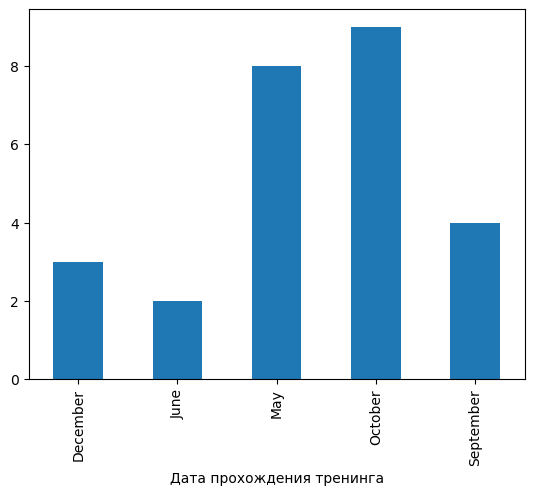

In [51]:
data.groupby(data['Дата прохождения тренинга'].\
             dt.month_name())['Преподаватели'].count().\
             plot.bar()
plt.show()

## Визуализация данных. Matplotlib

In [52]:
# Подключение бибилиотек
import matplotlib.pyplot as plt
import random

In [74]:
# Вывод гистограммы
x = list(range(10))
y = [random.randint(1,10) for _ in x]
print(x,y)

#plt.plot(x, y)
#plt.scatter(x, y, color='red')
#plt.barh(x, y)
#plt.hist(y)
#plt.pie(y)
#plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [2, 2, 4, 4, 9, 1, 6, 9, 4, 1]


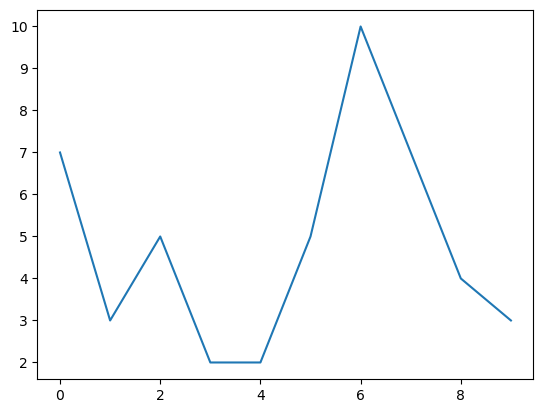

In [54]:
#Линейный график
plt.plot(x, y)
plt.show()

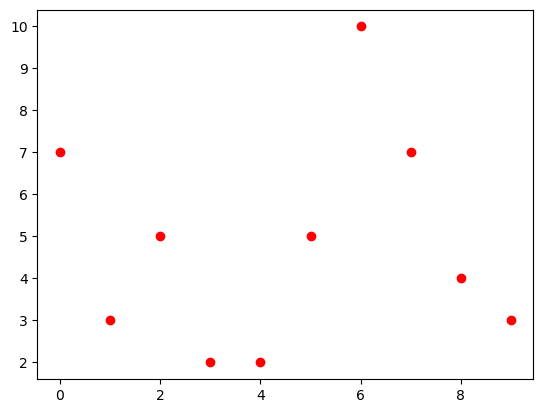

In [55]:
#Точечный график
plt.scatter(x, y, color='red')
plt.show()

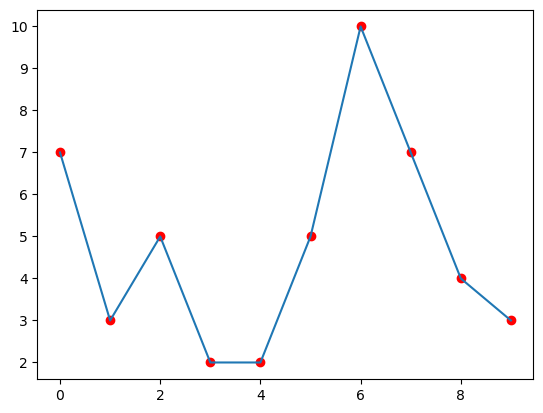

In [56]:
#Объединенный график
plt.plot(x, y)
plt.scatter(x, y, color='red')
plt.show()

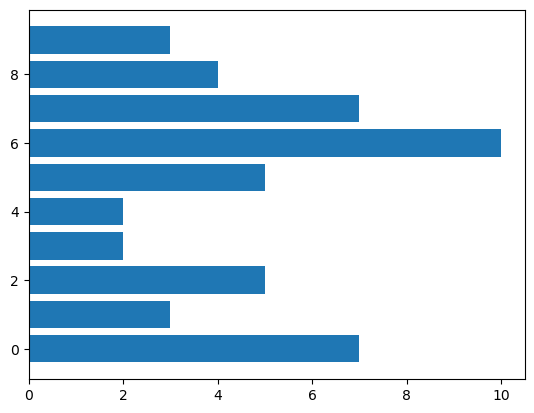

In [57]:
#Столбчатые диаграммы 
plt.barh(x, y)
plt.show()

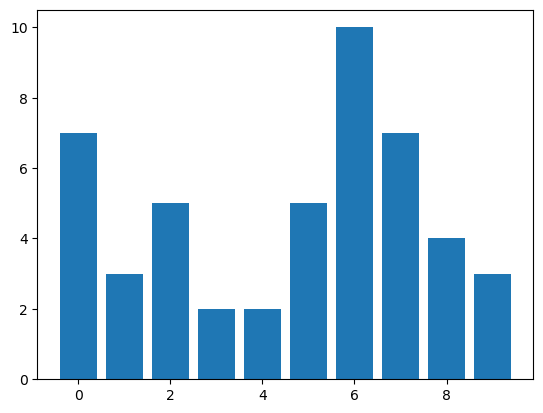

In [58]:
plt.bar(x, y)
plt.show()

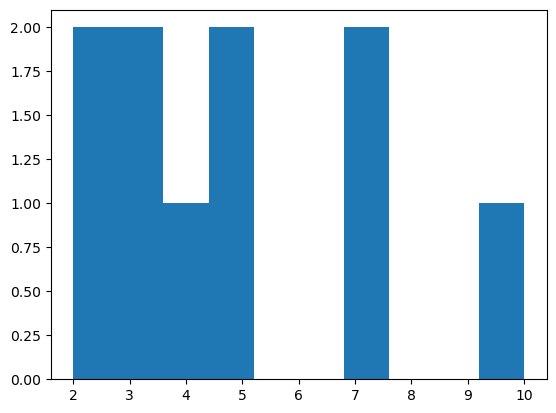

In [59]:
plt.hist(y)
plt.show()

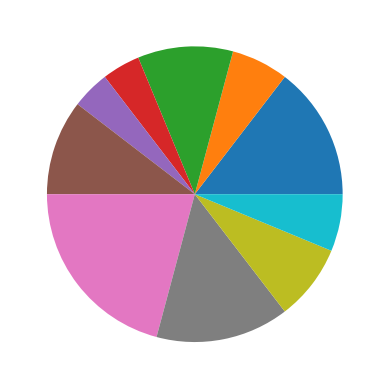

In [60]:
#Круговые диаграммы
plt.pie(y)
plt.show()

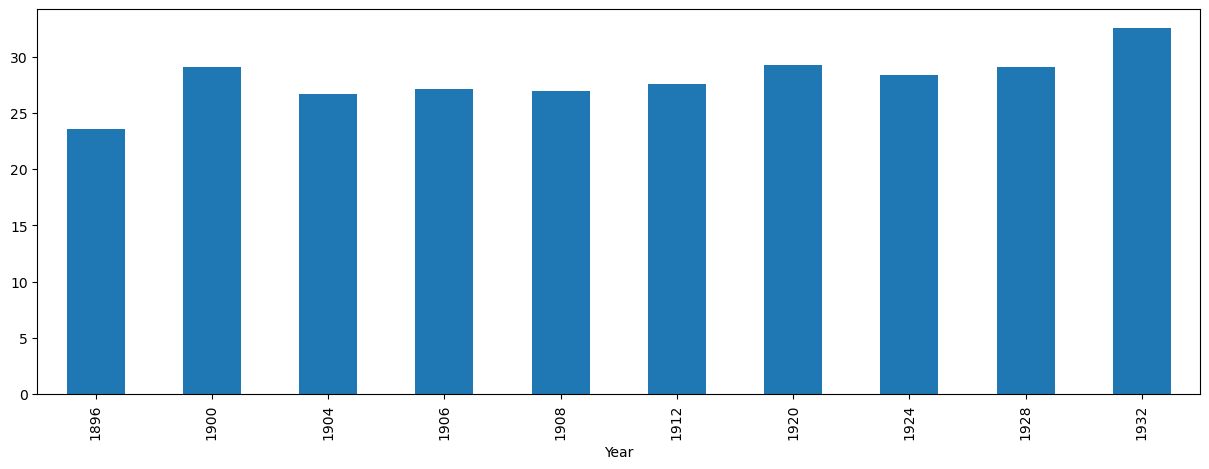

In [61]:
#Средний возраст участников по годам
df.groupby('Year')['Age'].mean()[:10].plot(kind='bar', figsize=[15,5])
plt.show()

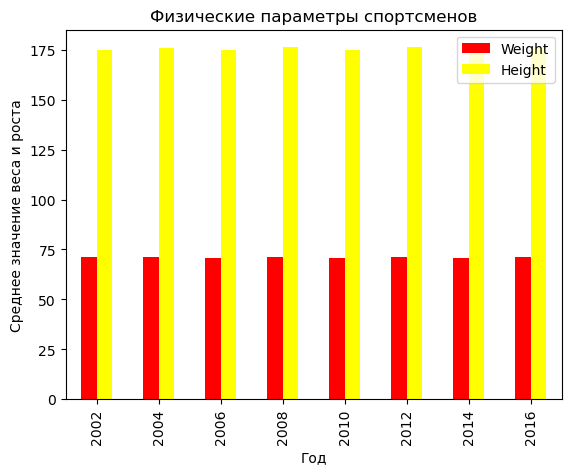

In [62]:
#Средние показатели веса и роста по годам.
df_y = df.groupby('Year')[['Weight','Height']].mean()
df_y[df_y.index>2000].plot.bar(xlabel = 'Год',
                              ylabel = 'Среднее значение веса и роста',
                              title = 'Физические параметры спортсменов',
                              color = ['red','yellow'])
plt.show()

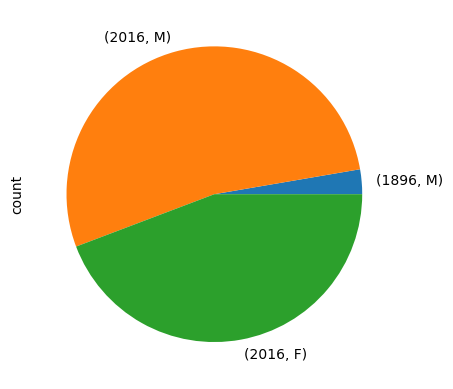

In [63]:
#Вывести диаграмму с количеством мужчин и женщин на последней олимпиаде
df[df['Year'].isin([df['Year'].max(),df['Year'].min()])].groupby('Year')['Sex'].value_counts().plot.pie()
plt.show()

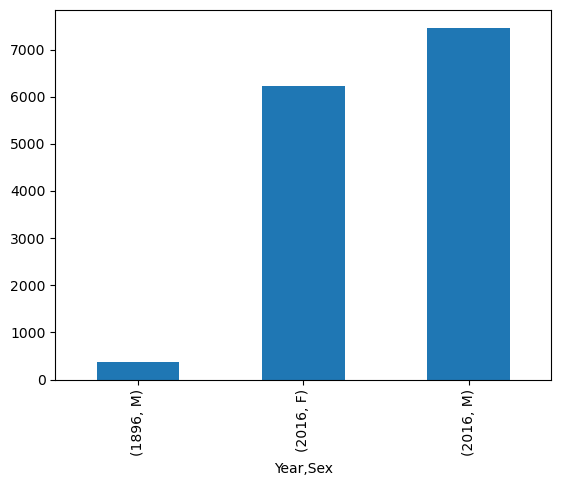

In [64]:
df[df['Year'].isin([df['Year'].max(),df['Year'].min()])].groupby(['Year','Sex'])['ID'].count().plot.bar()
plt.show()

## Диаграммы searbotn

Парные диаграммы pairplot используют для сравнения распределения пар числовых переменных, этот метод создает сетку точечных диаграмм. он также содержит гистограмму для каждой функции в диагональных прямоугольниках.

D:\programs\ANC\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x800 with 0 Axes>

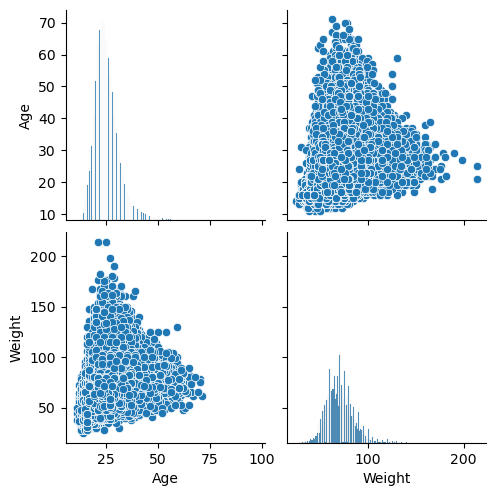

In [66]:
import seaborn as sns
#Парные диаграммы  import seaborn as sns
plt.figure(figsize=(18,8))
sns.pairplot(df[['Age','Weight']])  #сиситема строит гистограмму. участники в основном молодые.
plt.show() 

## Тепловая карта.
Как считается кореляция. 


In [69]:
df[['Age','Weight','Height']].corr() #набор столбов для который считается кореляция.


,Age,Weight,Height
Age,1.000000,0.212069,0.138246
Weight,0.212069,1.000000,0.796213
Height,0.138246,0.796213,1.000000


<Axes: >

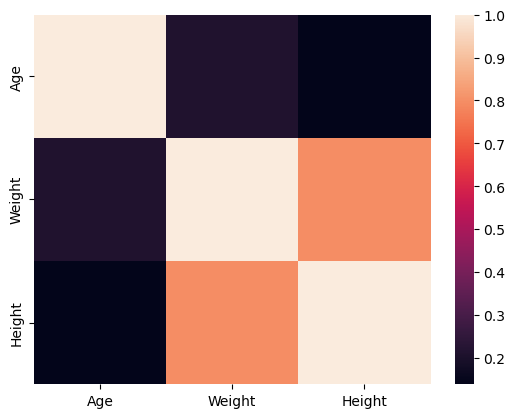

In [71]:
#тепловая карта удобней
sns.heatmap(df[['Age','Weight','Height']].corr())

<Axes: xlabel='Year'>

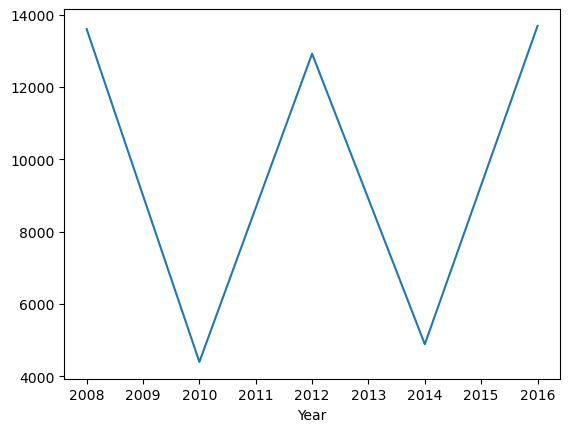

In [72]:
#Линейный график
part_count_year = df['Year'].value_counts().sort_index().tail(5)
sns.lineplot(x=part_count_year.index, y = part_count_year.values)

## Ящик с усами
Ящик с усами визуализирует распределение между числовыми и категориальными переменными, отображая информацию о квартилях.


<Axes: >

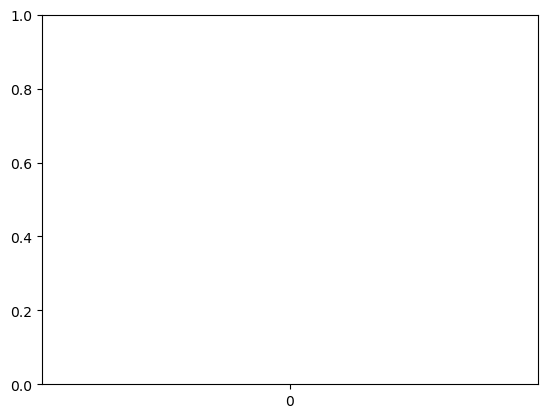

In [85]:
sns.boxplot(df=df[['Age', 'Weight', 'Height']])

<Axes: xlabel='Year', ylabel='Age'>

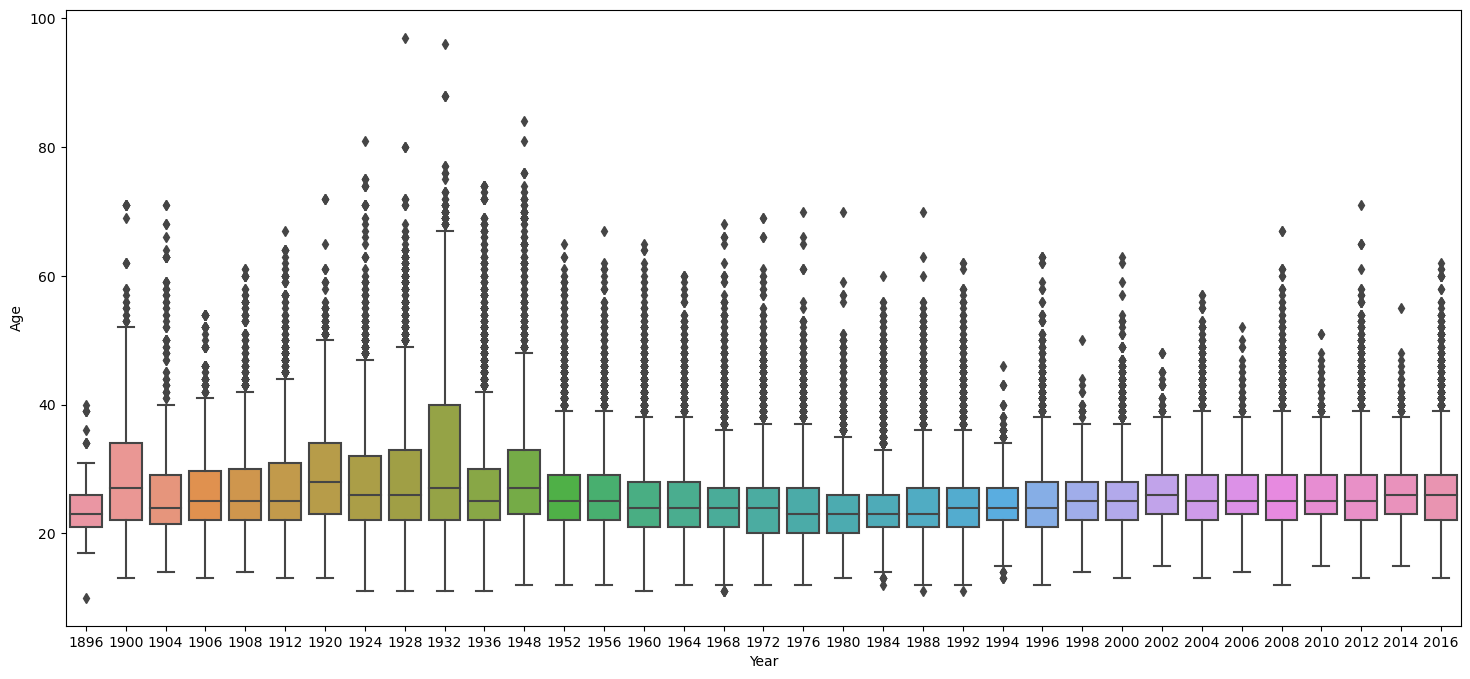

In [86]:
#возраст по годам
plt.figure(figsize=(18,8))
sns.boxplot(x=df['Year'],y=df['Age'])